# Analys av Iris datasetet med Scikit-Learn
## k means clustering
### Mål:
- Repetera Machine Learning: Scikit-Learn, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klustra*** species i iris datasetet med hjälp av k means clustering.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
`from sklearn.cluster import KMeans`  
- Eftersom det här är en klustring, så ska vi enbart se om k means kan identifiera (klustra) de olika species av iris på egen hand. Sedan jämför vi med "facit". För y, så byts namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`model = KMeans(n_clusters=3) # create a KMeans object with three clusters`
- Tränar modellen med .fit  
`model.fit(X)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
- Visualiserar en Confusion Matrix med Matplotlib.
## Noteringar / Lessons Learned
- 
## Hyperparametrar:
- antal clusters
## Länkar:
[Geek for Geeks - k means clustering](https://www.geeksforgeeks.org/k-means-clustering-introduction/)

In [1]:
import seaborn as sn
import pandas as pd
import sklearn as sk
from sklearn.cluster import KMeans # KMeans algorithm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np

In [2]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe

In [3]:
pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
X = iris.drop(columns=['species'])
y = iris[['species']]

# Perform train/test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# convert y to 1D (numpy) array to avoid warning
if not isinstance(y, np.ndarray):
    y = y.values.ravel()
    y = y.astype(int) # make sure y_train is of type int

In [8]:
type(y)

numpy.ndarray

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
model = KMeans(n_clusters=3) # create a KMeans object
model.fit(X)
y_pred = model.predict(X)

In [7]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Eftersom klustringen inte gav samma "index" så att säga, så måste jag ändra det manuellt.

In [11]:
y_pred = np.where(y_pred == 0, 1, np.where(y_pred == 1, 0, y_pred))

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [14]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



<Axes: >

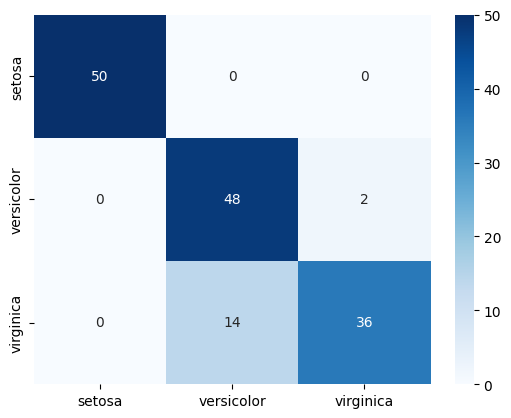

In [22]:
cm = confusion_matrix(y, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

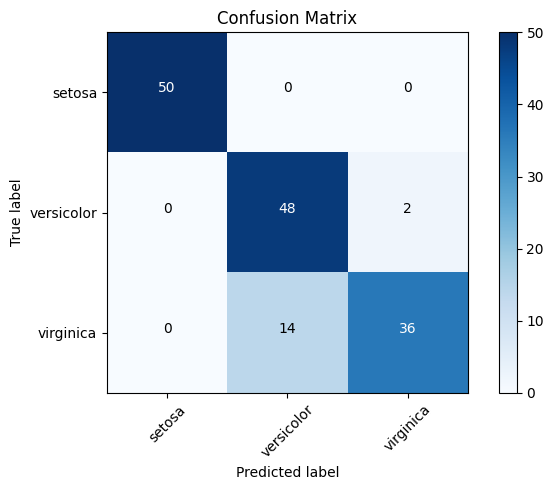

In [20]:
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(7, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['setosa', 'versicolor', 'virginica'], rotation=45)
plt.yticks(tick_marks, ['setosa', 'versicolor', 'virginica'])

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()